# 对于her2数据集，我们已经做了可预测基因的通路富集分析，看一下是否可以有通路在空间上的分布

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scprep as scp
import anndata as ad
import scanpy as sc

In [25]:
preds_list=np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/G1/preds.npy')
ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/G1/center.npy')
gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/G1/gts.npy')
adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list
predicted_gene_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/her_hvg_cut_1000.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list

In [26]:
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/HER2-images/HE/G1.jpg'
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [27]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, '#FFFFFF'),  
          (0.1, '#FFFFFF'),  
          (1, '#FF0000')] 
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

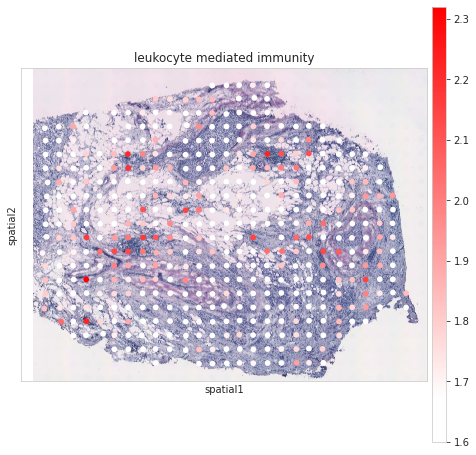

In [28]:
plt.rcParams["figure.figsize"] = (8, 8)
genes=['C1QB','IGKC','PTGDS','C3','IGHA1','IGHG3','C1R','HLA-DRA','CD74','HLA-B','IGLC3']
# genes=['C1QB','IGKC','HLA-B','C3','IGHA1','IGHG3','C1R','HLA-DRA','IGLC3','CD74']
gene_exp=np.mean(adata_gt.to_df()[genes].values,axis=1)
adata_gt.obs['leukocyte mediated immunity']=gene_exp.reshape(adata_gt.shape[0],)
sc.pl.spatial(adata_gt,img=img,color=['leukocyte mediated immunity'],vmin=1.6,cmap=cmap,spot_size=120,alpha_img=0.9)

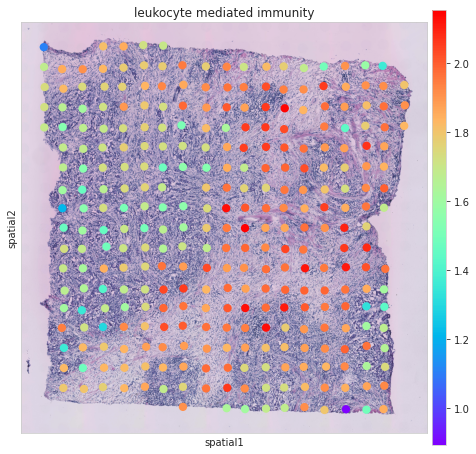

In [135]:
plt.rcParams["figure.figsize"] = (8, 8)
genes=['C1QB','IGKC','PTGDS','C3','IGHA1','IGHG3','C1R','HLA-DRA','CD74','HLA-B','IGLC3']
# genes=['C1QB','IGKC','HLA-B','C3','IGHA1','IGHG3','C1R','HLA-DRA','IGLC3','CD74']
gene_exp=np.mean(adata.to_df()[genes].values,axis=1)
adata.obs['leukocyte mediated immunity']=gene_exp.reshape(adata.shape[0],)
sc.pl.spatial(adata,img=img,color=['leukocyte mediated immunity'],cmap='rainbow',spot_size=120,alpha_img=0.9)

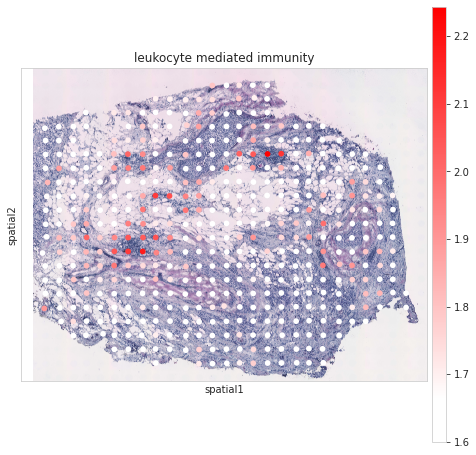

In [29]:
plt.rcParams["figure.figsize"] = (8, 8)
genes=['C1QB','IGKC','PTGDS','C3','IGHA1','IGHG3','C1R','HLA-DRA','CD74','HLA-B','IGLC3']
# genes=['C1QB','IGKC','HLA-B','C3','IGHA1','IGHG3','C1R','HLA-DRA','IGLC3','CD74']
gene_exp=np.mean(adata.to_df()[genes].values,axis=1)
adata.obs['leukocyte mediated immunity']=gene_exp.reshape(adata.shape[0],)
sc.pl.spatial(adata,img=img,color=['leukocyte mediated immunity'],vmin=1.6,cmap=cmap,spot_size=120,alpha_img=0.9)